In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Jan19_MECTune"

In [3]:
##Regular tune prior true and smearcept to be used


#Recall for comparison it will be the MEC tune for prior true

In [4]:
####Load in MECTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[ 47.21201646 136.0093503   61.05931869  21.24654483   7.263672
   6.66049554]

[ 40.65831303 979.73743312 986.69333677 479.51333265 173.34499843
 114.88041891]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[19.21965235 35.55935628 13.36897008  7.02825689  2.07583359  2.55905788]

[ 12.04845879 285.47329057 267.68210436 134.33220236  54.3722367
  35.3196804 ]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[ 27.99236411 100.44999403  47.69034861  14.21828795   5.18783841
   4.10143766]

[ 28.60985424 694.26414255 719.01123241 345.1811303  118.97276173
  79.56073851]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 27.99236411 100.44999403  47.69034861  14.21828795   5.18783841
   4.10143766  28.60985424 694.26414255 719.01123241 345.1811303
 118.97276173  79.56073851]
12


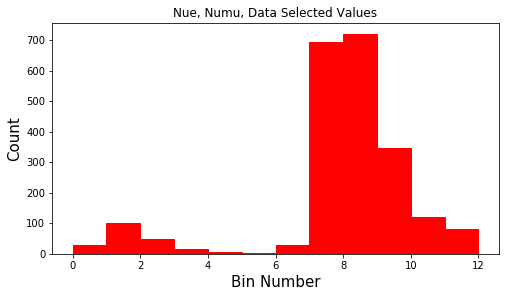

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_MECTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_MECTune_input_recoE_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19


In [10]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19_MECTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

#######################The regular tune bkg stat uncertainties

ending = "Jan19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[ 7.56537423 15.10659856  6.29681841  1.93596481  0.35686457  0.52304459]

[ 25.49630765 667.08307319 990.5281648  508.80297831 203.56071232
 123.6249744 ]

[5.65827009 7.22904869 1.1592881  0.8356417  0.15572174 0.35322086]

[  6.27232845 101.31446365  75.88071481  34.04410151  22.12514915
   7.55075645]



In [11]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[13.22364433 22.33564725  7.45610652  2.77160651  0.51258631  0.87626545]

[  31.7686361   768.39753684 1066.40887961  542.84707982  225.68586147
  131.17573085]

[1.32236443e+01 2.23356473e+01 7.45610652e+00 2.77160651e+00
 5.12586308e-01 8.76265453e-01 3.17686361e+01 7.68397537e+02
 1.06640888e+03 5.42847080e+02 2.25685861e+02 1.31175731e+02]


In [12]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [14]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_RecoE_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[2.53017148e+01 7.99407377e+01 3.99007309e+01 1.26380588e+01
  4.54239104e+00 4.57004876e+00 1.81604317e+01 5.05284250e+02
  5.65974539e+02 3.33914439e+02 1.05960908e+02 7.85345339e+01]
 [7.99407377e+01 3.08108472e+02 1.62251623e+02 4.71041703e+01
  1.69882573e+01 1.83169989e+01 5.28640247e+01 1.81795820e+03
  2.19221301e+03 1.40647066e+03 4.31347278e+02 3.11483241e+02]
 [3.99007309e+01 1.62251623e+02 8.90573718e+01 2.47740106e+01
  9.02293871e+00 9.86893150e+00 2.57474340e+01 9.45957267e+02
  1.18265161e+03 7.82946291e+02 2.38548628e+02 1.71617214e+02]
 [1.26380588e+01 4.71041703e+01 2.47740106e+01 8.21778604e+00
  2.84539621e+00 2.87104210e+00 8.10721565e+00 2.86469603e+02
  3.53382346e+02 2.17248914e+02 6.95344904e+01 5.02987675e+01]
 [4.54239104e+00 1.69882573e+01 9.02293871e+00 2.84539621e+00
  1.12641799e+00 1.05321463e+00 2.87655813e+00 1.03590365e+02
  1.27825784e+02 7.88274574e+01 2.52781268e+01 1.81911519e+01]
 [4.57004876e+00 1.83169989e+01 9.86893150e+00 2.87104210e+00
  1

In [15]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 8.12285715e+00 -9.86680642e+00 -1.74222042e+01 -4.65980464e+00
  -2.81736980e+00 -3.93907429e+00  7.13867033e+01  1.86123075e+02
  -1.15641117e+02 -1.64407563e+01  1.30600711e+01 -7.27281475e-01]
 [-9.86680642e+00  1.19851756e+01  2.11626910e+01  5.66024854e+00
   3.42224933e+00  4.78477989e+00 -8.67131811e+01 -2.26083054e+02
   1.40468864e+02  1.99705297e+01 -1.58640231e+01  8.83426287e-01]
 [-1.74222042e+01  2.11626910e+01  3.73677872e+01  9.99452117e+00
   6.04279886e+00  8.44867209e+00 -1.53112839e+02 -3.99203649e+02
   2.48031340e+02  3.52627416e+01 -2.80117232e+01  1.55990018e+00]
 [-4.65980464e+00  5.66024854e+00  9.99452117e+00  2.67317015e+00
   1.61622846e+00  2.25971186e+00 -4.09521041e+01 -1.06772427e+02
   6.63393437e+01  9.43149819e+00 -7.49211503e+00  4.17216446e-01]
 [-2.81736980e+00  3.42224933e+00  6.04279886e+00  1.61622846e+00
   9.77189734e-01  1.36624697e+00 -2.47600984e+01 -6.45557989e+01
   4.01095063e+01  5.70238889e+00 -4.52981622e+00  2.52253712e-01]
 [-3.

In [16]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

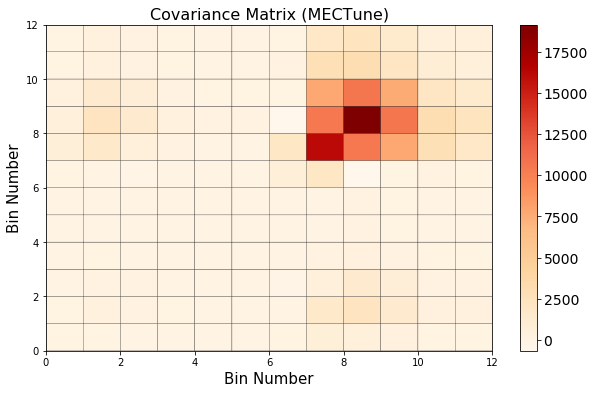

In [17]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (MECTune)', fontsize=16)


plt.savefig("data_covmat_MC_MECTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [18]:
np.savetxt("data_covmat_MC_MECTune_input_recoE_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')